In [16]:
import xgboost
import numpy as np
import shap

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [17]:
N = 2000
X = np.zeros((N,5))
X[:1000,0] = 1
X[:500,1] = 1
X[1000:1500,1] = 1
X[:250,2] = 1
X[500:750,2] = 1
X[1000:1250,2] = 1
X[1500:1750,2] = 1
X[:,0:3] -= 0.5
y = 2*X[:,0] - 3*X[:,1]

In [18]:
np.cov(X.T)

array([[0.25012506, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.25012506, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.25012506, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [19]:
X.mean(0)

array([0., 0., 0., 0., 0.])

In [20]:
Xd = xgboost.DMatrix(X, label=y)
model = xgboost.train({
    'eta':1, 'max_depth':3, 'base_score': 0, "lambda": 0
}, Xd, 1)
print("Model error =", np.linalg.norm(y-model.predict(Xd)))
print(model.get_dump(with_stats=True)[0])

Model error = 0.0
0:[f1<0] yes=1,no=2,missing=1,gain=4500,cover=2000
	1:[f0<0] yes=3,no=4,missing=3,gain=1000,cover=1000
		3:leaf=0.5,cover=500
		4:leaf=2.5,cover=500
	2:[f0<0] yes=5,no=6,missing=5,gain=1000,cover=1000
		5:leaf=-2.5,cover=500
		6:leaf=-0.5,cover=500



In [28]:
pred = model.predict(Xd, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

0.0

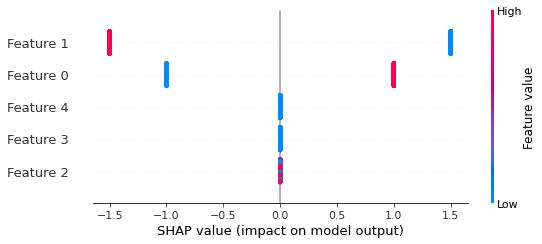

In [29]:
shap.summary_plot(shap_values, X)

In [30]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X)
lr.coef_.round(2)

array([ 2., -3.,  0.,  0.,  0.])

In [31]:
main_effect_shap_values = lr.coef_ * (X - X.mean(0))
np.linalg.norm(shap_values - main_effect_shap_values)

3.4697834078323924e-13

In [32]:
shap_interaction_values = explainer.shap_interaction_values(Xd)
shap_interaction_values[0]

array([[ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -1.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ]], dtype=float32)

In [33]:
N = 2000
X = np.zeros((N,5))
X[:1000,0] = 1

X[:500,1] = 1
X[1000:1500,1] = 1

X[:250,2] = 1
X[500:750,2] = 1
X[1000:1250,2] = 1
X[1500:1750,2] = 1

X[:125,3] = 1
X[250:375,3] = 1
X[500:625,3] = 1
X[750:875,3] = 1
X[1000:1125,3] = 1
X[1250:1375,3] = 1
X[1500:1625,3] = 1
X[1750:1875,3] = 1
X[:,:4] -= 0.4999 # we can't exactly mean center the data or XGBoost has trouble finding the splits
y = 2* X[:,0] - 3 * X[:,1] + 2 * X[:,1] * X[:,2]

In [34]:
X.mean(0)

array([1.e-04, 1.e-04, 1.e-04, 1.e-04, 0.e+00])

In [35]:
Xd = xgboost.DMatrix(X, label=y)
model = xgboost.train({
    'eta':1, 'max_depth':4, 'base_score': 0, "lambda": 0
}, Xd, 1)
print("Model error =", np.linalg.norm(y-model.predict(Xd)))
print(model.get_dump(with_stats=True)[0])

Model error = 1.7365037830677591e-06
0:[f1<0.000100001693] yes=1,no=2,missing=1,gain=4499.40039,cover=2000
	1:[f0<0.000100001693] yes=3,no=4,missing=3,gain=999.999756,cover=1000
		3:[f2<0.000100001693] yes=7,no=8,missing=7,gain=124.949997,cover=500
			7:leaf=0.99970001,cover=250
			8:leaf=-9.99800031e-05,cover=250
		4:[f2<0.000100001693] yes=9,no=10,missing=9,gain=124.949951,cover=500
			9:leaf=2.99970007,cover=250
			10:leaf=1.99989998,cover=250
	2:[f0<0.000100001693] yes=5,no=6,missing=5,gain=999.999756,cover=1000
		5:[f2<0.000100001693] yes=11,no=12,missing=11,gain=125.050049,cover=500
			11:leaf=-3.0000999,cover=250
			12:leaf=-1.99989998,cover=250
		6:[f2<0.000100001693] yes=13,no=14,missing=13,gain=125.050018,cover=500
			13:leaf=-1.00010002,cover=250
			14:leaf=0.000100019999,cover=250



In [36]:
# make sure the SHAP values add up to marginal predictions
pred = model.predict(Xd, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

4.7683716e-07

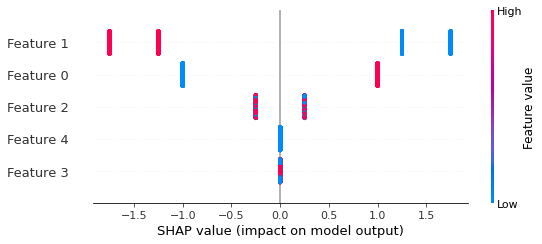

In [37]:
shap.summary_plot(shap_values, X)

In [38]:
lr = linear_model.LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X)
lr.coef_.round(2)

array([ 2., -3.,  0.,  0.,  0.])

In [39]:
main_effect_shap_values = lr.coef_ * (X - X.mean(0))
np.linalg.norm(shap_values - main_effect_shap_values)

15.811387829626844

In [40]:
# SHAP interaction contributions:
shap_interaction_values = explainer.shap_interaction_values(Xd)
shap_interaction_values[0].round(2)

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -1.5 ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]], dtype=float32)

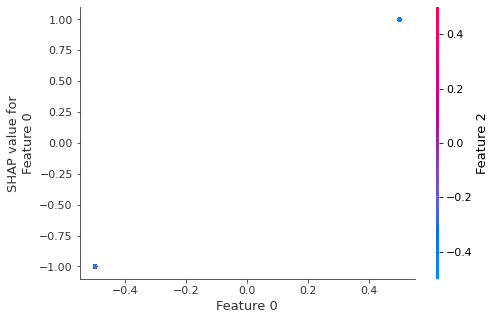

In [41]:
shap.dependence_plot(0, shap_values, X)

invalid value encountered in true_divide
invalid value encountered in true_divide


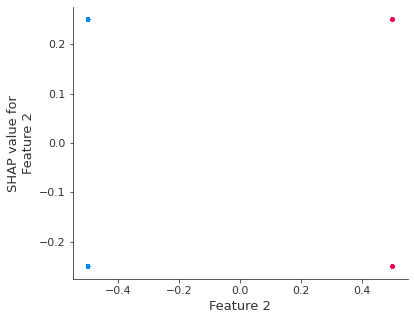

In [42]:
shap.dependence_plot(2, shap_values, X)

# 

# 

# 

# 

In [44]:
import transformers
import datasets
import shap
import numpy as np

In [45]:
dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:20]]

Reusing dataset imdb (C:\Users\pnl0gp8t\.cache\huggingface\datasets\imdb\plain_text\1.0.0\2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


In [46]:
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)
classifier(short_data[:2])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

[[{'label': 'NEGATIVE', 'score': 0.07582061737775803},
  {'label': 'POSITIVE', 'score': 0.9241793751716614}],
 [{'label': 'NEGATIVE', 'score': 0.0183425210416317},
  {'label': 'POSITIVE', 'score': 0.9816575050354004}]]

In [47]:
explainer = shap.Explainer(classifier)

In [48]:
shap_values = explainer(short_data[:2])

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|███████████████████████████████████▌                                   | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [02:25, 72.74s/it]                                                                            


In [49]:
shap.plots.text(shap_values[:,:,"POSITIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [50]:
#Pipeline

In [51]:
pmodel = shap.models.TransformersPipeline(classifier, rescale_to_logits=False)

In [52]:
pmodel = shap.models.TransformersPipeline(classifier, rescale_to_logits=True)
pmodel(short_data[:2])

array([[-2.50053594,  2.50053583],
       [-3.98002053,  3.98002198]])

In [53]:
explainer2 = shap.Explainer(pmodel)
shap_values2 = explainer2(short_data[:2])
shap.plots.text(shap_values2[:,:,1])

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|███████████████████████████████████▌                                   | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [02:02, 61.06s/it]                                                                            


In [54]:
explainer2 = shap.Explainer(pmodel, classifier.tokenizer)
shap_values2 = explainer2(short_data[:2])
shap.plots.text(shap_values2[:,:,1])

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|███████████████████████████████████▌                                   | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [02:02, 61.05s/it]                                                                            


In [55]:
masker = shap.maskers.Text(classifier.tokenizer)
explainer2 = shap.Explainer(pmodel, masker)
shap_values2 = explainer2(short_data[:2])
shap.plots.text(shap_values2[:,:,1])

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|███████████████████████████████████▌                                   | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [02:03, 61.98s/it]                                                                            


In [56]:
shap_values = explainer(short_data[:20])

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   5%|███▌                                                                  | 1/20 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|█████████▎                                                    | 3/20 [01:57<06:48, 24.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  20%|████████████▍                                                 | 4/20 [02:47<09:12, 34.55s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|███████████████▌                                              | 5/20 [03:43<10:41, 42.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|██████████████████▌                                           | 6/20 [04:41<11:10, 47.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  35%|█████████████████████▋                                        | 7/20 [05:38<11:02, 50.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████████████████████████▊                                     | 8/20 [06:32<10:24, 52.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|███████████████████████████▉                                  | 9/20 [07:21<09:20, 50.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|██████████████████████████████▌                              | 10/20 [08:20<08:54, 53.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████████████████████████████████▌                           | 11/20 [09:19<08:15, 55.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|████████████████████████████████████▌                        | 12/20 [10:11<07:14, 54.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  65%|███████████████████████████████████████▋                     | 13/20 [11:03<06:15, 53.57s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|██████████████████████████████████████████▋                  | 14/20 [12:06<05:38, 56.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|█████████████████████████████████████████████▊               | 15/20 [12:59<04:37, 55.53s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  80%|████████████████████████████████████████████████▊            | 16/20 [13:51<03:37, 54.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|███████████████████████████████████████████████████▊         | 17/20 [14:42<02:40, 53.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|██████████████████████████████████████████████████████▉      | 18/20 [15:33<01:45, 52.53s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  95%|█████████████████████████████████████████████████████████▉   | 19/20 [16:19<00:50, 50.60s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|█████████████████████████████████████████████████████████████| 20/20 [17:14<00:00, 52.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 21it [18:11, 54.56s/it]                                                                           


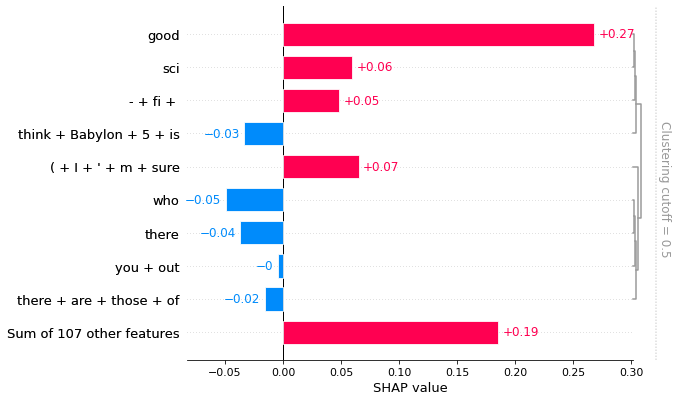

In [57]:
shap.plots.bar(shap_values[0,:,"POSITIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


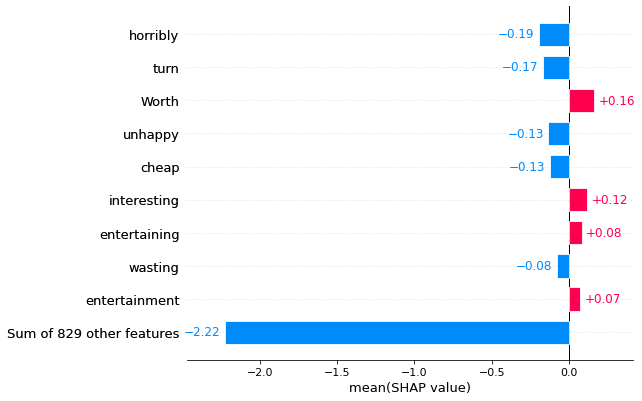

In [58]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0))

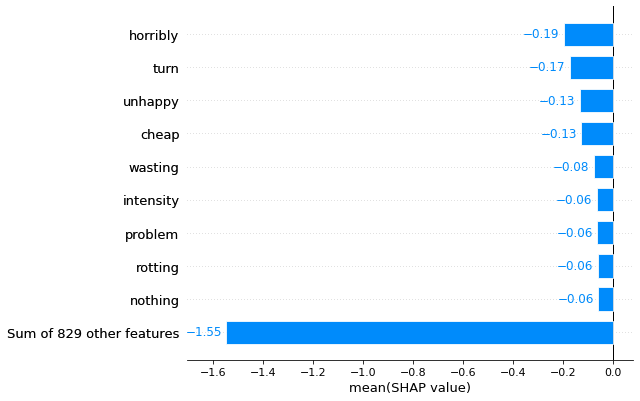

In [59]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0), order=shap.Explanation.argsort)